In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg

In [16]:
import warnings
warnings.simplefilter('ignore')

In [23]:
import seaborn as sns

In [19]:
from sklearn.metrics import confusion_matrix as cm

In [3]:
data=pd.read_csv('Datos/clean_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [10]:
data.shape

(68431, 13)

In [4]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [5]:
X.shape

(68431, 12)

In [6]:
y.shape

(68431,)

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [8]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.2290811443410259 0.2253072483932057


En este caso, los. valores de score son muy bajos. Así que se considerará la utilización de otro modelo.

In [13]:
from sklearn.linear_model import LogisticRegression as LogReg

In [ ]:
import warnings 

In [17]:
logreg=LogReg()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
train_score=logreg.score(X_train, y_train)   # R2
test_score=logreg.score(X_test, y_test)

print (train_score, test_score)

0.7267645769399387 0.722510411339227


In [20]:
y_pred=logreg.predict(X_test)

In [21]:
cm(y_test, y_pred)

array([[5373, 1480],
       [2318, 4516]])

(2.5, -0.5)

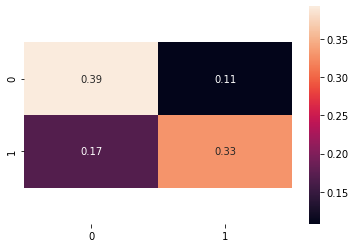

In [24]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)